<a href="https://colab.research.google.com/github/vin136/Machine-Learning-Interview-Questions/blob/main/pandas_workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big ideas/techniques



1. Dont use apply except for non-vectorized data-types like string.

## String Type

String vs Object vs Category

Pandas 1.0 introduced the new 'string' type. In addition to being more explicit than object, it supports missing values that are not NaN.
We can also typecast to Category (memory effficency with almost all the methods).
```
make.astype('string')
make.astype('category')
```
### Manipulation

`splitting`

```
#take lower value
# expand= True, converts a list to a df with multiple columns
age = pd.Series(['0-10', '11-15', '11-15', '61-65', '46-50'])
age.str.split('-',expand=True).iloc[:,0].astype(int)

#take highest value
age.str.slice(-2).astype(int)

#take mean
age.str.split('-',expand=True).astype('int').mean(axis='columns')

#get a random-value between
def between(row):
 l,h = *row
 return np.random.randint(l,h)
age.str.split('-',expand=True).apply(between,axis='columns')



```

`other methods`

- .find("e") (returns index of first occurence else -1)
- .startswith(),.capitalize,.lower,.upper
- extract(r'[a-e]',expand=False)
- `.str.replace to replace substrings` and `.replace to replace mappings of complete strings`

### Aside: Basic regex

`.`	Matches any single character except newline

`^`	∙ Anchors a match at the start of a string, Complements a character class

`$`	Anchors a match at the end of a string

`*`	Matches zero or more repetitions

`+`	Matches one or more repetitions

\d matches any decimal digit character. \D is the opposite. It matches any character that isn’t a decimal digit


## General techniques

1. .query(expr) : Evaluate expr to filter dataframe. Refer to variables by prefixing with @. Use backticks around column names with spaces.

2. .rename(mapper=None, index=None,
  columns=None, axis=0, copy=True,
  level=None, errors='ignore') : Change axis labels. Pass columns or index as a dictionary (mapping old values to new values) or a function (accepting the old value and returning the new value).

3. .replace()

4. .drop(),.dropna()

5. IF ELSE: 


```
replace({'Yes': True, 'No': False, np.nan: False})
```



6. String replace and extract: 

```
lambda df_:df_.python3_version_most
              .str.replace('_', '.').str.extract(r'(\d\.\d)')
```



In [30]:
age = pd.Series(['0-10', '11-15', '11-15', '61-65', '46-50'])
import numpy as np
def between(row):
  return np.random.randint(*row)
age.str.split('-',expand=True).apply(between,axis='columns')

0     3
1    13
2    11
3    63
4    47
dtype: int64

## Pandas Series

In [22]:
import pandas as pd
import numpy as np


s = pd.Series([0,9,8])
s

#behaves like numpy

s[s>s.mean()]

1    9
2    8
dtype: int64

In [25]:
#data types

c = pd.Series(['s','m','l','xl'],dtype='category')



### Operator/dunder methods

In [13]:
s1 = pd.Series([10, 20, 30], index=[1,2,2])
s2 = pd.Series([35, 44, 53], index=[2,2,4], name='s2')
s1
s2

2    35
2    44
4    53
Name: s2, dtype: int64

In [16]:
# operations happen with index alignment.
s1+s2

1     NaN
2    55.0
2    64.0
2    65.0
2    74.0
4     NaN
dtype: float64

In [24]:

#often there are named ways of doing things and they r more flexible.

s1.add(s2,fill_value=0.0)
#makes chaining possible
s1 = pd.Series([10, 20, 30], index=[1,2,3])
s2 = pd.Series([1,2,3], index=[1,2,3], name='s2')

s1.add(s2)
s1.mul(s2)
s1.mod(s2)
s1.pow(s2)

##now some chaining
s1.div(s2).add(s2).mod(s2)

#boolean comparision methods
s1.ge(s2)
s1.gt(s2)

#logical

np.logical_and(s1,s2)
np.invert(s1)


1   -11
2   -21
3   -31
dtype: int64

### Aggregations

In [26]:
import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/master/data/' \
      'vehicles.csv.zip'
df = pd.read_csv(url)
city_mpg = df.city08
highway_mpg = df.highway08

<ipython-input-26-bc01008edca4>:4: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


array([0.  , 0.11, 0.22, 0.33, 0.44, 0.56, 0.67, 0.78, 0.89, 1.  ])

In [32]:
city_mpg.mean()
city_mpg.quantile(np.round(np.linspace(0,1,10),2))

#can get multiple aggregaion at once
def second_to_last(s):
  return s.iloc[-1]
city_mpg.agg(['mean', np.var, max, second_to_last])



mean               18.369045
var                62.503036
max               150.000000
second_to_last     16.000000
Name: city08, dtype: float64

### Conversion

In [40]:
#use numpy to inspect limits
np.iinfo('int64')

#use .astype to cast appropriately
make = df.make

#memomry_usage gives complete memory(obj + auxillary storage)

print(make.memory_usage(deep=True),make.nbytes)

print(f"after conversion to category type")
(make.astype('category').memory_usage(deep=True))

#A categorical series is useful for string data and can result in large memory savings. 
#This is because pandas stores Python strings when you have string data. When you convert it to 
#categorical data, pandas no longer uses Python strings for each value but optimizes it, 
#so repeating values are not duplicated. You still have all of the functionality found off of the .str attribute

2606395 329152
after conversion to category type


95888

### Manipulation methods

In [43]:
#.apply(slow but handy)

%%timeit
city_mpg.gt(20)

122 µs ± 31.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [45]:
def mygt(value):
  return value>20

In [46]:
%%timeit
city_mpg.apply(mygt)


7.82 ms ± 319 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [52]:
# .where and select

make = df.make
top5 = make.value_counts().iloc[:5].index
top10 = make.value_counts().iloc[:10].index

#if true,keep as is, else replace with 'other'
make.where(make.isin(top5),'other')


#if - else

pd.Series(np.select([make.isin(top5),make.isin(top10)],
          [make,'top10'],
          'other'),index=make.index)

0        other
1        other
2        Dodge
3        Dodge
4        other
         ...  
41139    other
41140    other
41141    other
41142    other
41143    other
Length: 41144, dtype: object

In [53]:
#speed check
def generalize_top5(val):
    if val in top5:
        return val
    return 'Other'

In [54]:
%%timeit
make.where(make.isin(top5),'other')


5.14 ms ± 1.13 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [55]:
%%timeit
make.apply(generalize_top5)

41.1 ms ± 1.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [57]:
##1.missing

cyl = df.cylinders
cyl.isna(
).sum()

# dealing with missing

#.ffill(),.interpolate(),.fillna(data.mean()),.dropna()
#we can clip values too
(city_mpg
    .loc[:446]
    .clip(lower=city_mpg.quantile(.05),
          upper=city_mpg.quantile(.95))
)

0      19
1      11
2      23
3      11
4      17
       ..
442    15
443    15
444    15
445    15
446    27
Name: city08, Length: 447, dtype: int64

In [66]:
##2.duplicates

#keep parameter control the behaviour
city_mpg.drop_duplicates()

##3. ranking data
s = pd.Series([9,8,2,2,100])
#default = values at same pos => take avg
s.rank()

s.rank(method = 'min')

s.rank(method='dense')

#replacing

#allows you to replace data
make.replace('Subaru', 'スバル')

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4               スバル
            ...    
41139           スバル
41140           スバル
41141           スバル
41142           スバル
41143           スバル
Name: make, Length: 41144, dtype: object

In [69]:
#4.binning

#equal sized intervals
pd.cut(city_mpg, 10)

#(] intervals
pd.cut(city_mpg, [0, 10, 20, 40, 70, 150])

#can also divide into equal sized bins
pd.qcut(city_mpg,10,labels=range(1,11))

0        7
1        1
2        9
3        1
4        5
        ..
41139    7
41140    7
41141    6
41142    6
41143    4
Name: city08, Length: 41144, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

### Indexing

In [94]:
#1.renaming index
def mapper(val):
  return f'idx_{val}'


s = pd.Series(['susan','tom','criag'])

#send a mapping old_index - new_index
s.rename(index = {0:'first'})

#give a func
s.rename(mapper)

#give another series,if same index,takes its values as new index
city2 = city_mpg.rename(make)

#2.get a new index with monotonic inc
city2.reset_index(drop=True)



#.3 indexing,list of indices=>returns a series
city2.loc[['Subaru','Ferrari']]

city2.sort_index().loc['Ferrari':'Lamborghini']
#can also provide via stringmatching
city2.sort_index().loc["F":"J"]



Federal Coach    15
Federal Coach    13
Federal Coach    13
Federal Coach    14
Federal Coach    13
                 ..
Isuzu            15
Isuzu            15
Isuzu            15
Isuzu            27
Isuzu            18
Name: city08, Length: 9040, dtype: int64

In [96]:
#can also use boolean indexing via series..matches on indexes that are true
city2.loc[city2>4]


Alfa Romeo    19
Ferrari        9
Dodge         23
Dodge         10
Subaru        17
              ..
Subaru        19
Subaru        20
Subaru        18
Subaru        18
Subaru        16
Name: city08, Length: 41144, dtype: int64

In [88]:
#be careful with duplicates
idx = pd.Index(['Dodge'])
city2.loc[idx]

Dodge    23
Dodge    10
Dodge    12
Dodge    11
Dodge    11
         ..
Dodge    18
Dodge    17
Dodge    14
Dodge    14
Dodge    11
Name: city08, Length: 2583, dtype: int64

In [90]:
# chaining + intermediate filtering = use functions for boolean indexing
cost = pd.Series([1.00, 2.25, 3.99, .99, 2.79], 
    index=['Gum', 'Cookie', 'Melon', 'Roll', 'Carrots'])
inflation = 1.10
(cost
    .mul(inflation)
    .loc[lambda s_: s_ > 3]
)

#vs 
cost = pd.Series([1.00, 2.25, 3.99, .99, 2.79], 
   index=['Gum', 'Cookie', 'Melon', 'Roll', 'Carrots'])
inflation = 1.10
mask = cost > 3
(cost
    .mul(inflation)
    .loc[mask]
)

Melon    4.389
dtype: float64

In [98]:
#using iloc

city2.iloc[[0,1,-1]]

city2.iloc[-8:]

#can do boolean but only on list/numpy no series `city2.iloc[city2>4]` not allowed
city2.iloc[(city2>4).values]




Alfa Romeo    19
Ferrari        9
Dodge         23
Dodge         10
Subaru        17
              ..
Subaru        19
Subaru        20
Subaru        18
Subaru        18
Subaru        16
Name: city08, Length: 41144, dtype: int64

In [100]:
#filtering

#substring match
city2.filter(like='rd')

#regex
city2.filter(regex='(Ford)|(Subaru)')


Subaru    17
Subaru    21
Subaru    22
Ford      18
Ford      16
          ..
Subaru    19
Subaru    20
Subaru    18
Subaru    18
Subaru    16
Name: city08, Length: 4256, dtype: int64

In [102]:
#reindex: It will conform the series or return a series with the order of the index labels provided. 
#Unlike .loc and .filter, you can pass in labels that are not in the index, and it will not throw an error. 
#Rather it will insert missing values

s = pd.Series([0,9,18],index=['paul','ringo','ringo'])


#s.reindex(['paul','john']) => value error due to duplicates

s.iloc[:-1].reindex(['paul','john','paul'])


paul    0.0
john    NaN
paul    0.0
dtype: float64

### Plotting


In [103]:
url = 'https://github.com/mattharrison/datasets/raw/master/'\
    'data/alta-noaa-1980-2019.csv'
alta_df = pd.read_csv(url)    # doctest: +SKIP
dates = pd.to_datetime(alta_df.DATE)
snow = (alta_df
   .SNOW
   .rename(dates)
)
snow

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

<Axes: title={'center': 'Snowfall Histogram (in)'}, ylabel='Frequency'>

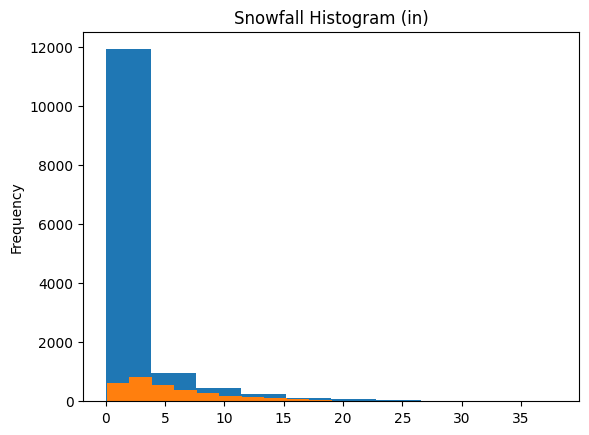

In [111]:
snow.plot.hist()
snow[snow>0].plot.hist(bins=20, title='Snowfall Histogram (in)')

<Axes: ylabel='Density'>

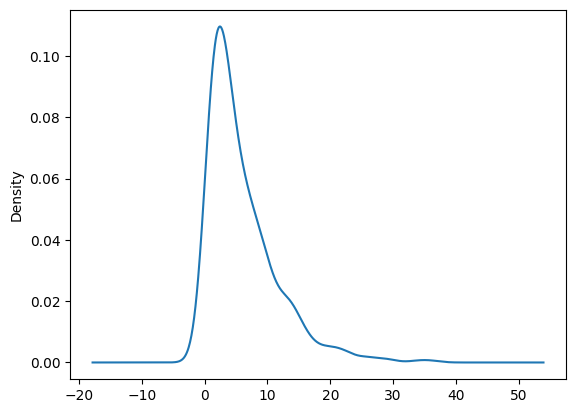

In [122]:
(snow.
 loc[lambda snow:(snow.index.month == 1) & (snow >0)].
 plot.kde())

<Axes: >

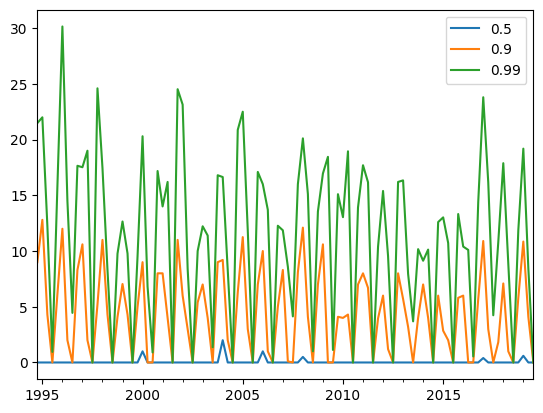

In [126]:
(snow
 .resample('Q')
 .quantile([.5, .9, .99])
 .unstack()
 .iloc[-100:]
 .plot.line()
 
 
)

<Axes: >

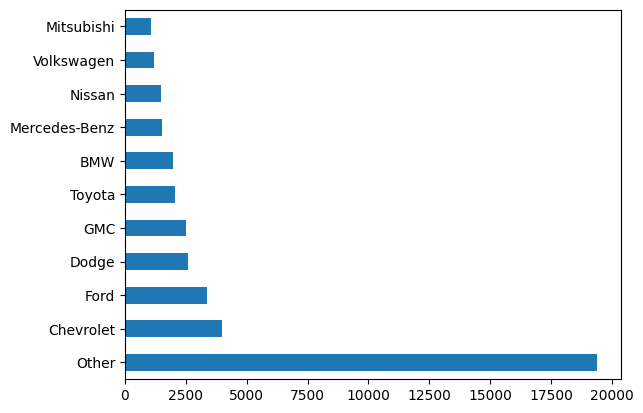

In [127]:
top10 = make.value_counts().index[:10]
(make
    .where(make.isin(top10), 'Other')
    .value_counts()
    .plot.barh()
)

### Categorical Data

In [131]:
#use .value_counts() to determine if it can be represented as categorical column

make.value_counts()

make.shape, make.nunique()

#uses less memory

cat_make = make.astype('category')
make.memory_usage(deep=True),cat_make.memory_usage(deep=True)

#also master

(2606395, 95888)

In [133]:
%%timeit
cat_make.str.upper()

524 µs ± 11 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [134]:
%%timeit
make.str.upper()

13.3 ms ± 3.69 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [136]:
#making ordinal cat type
make_type = pd.CategoricalDtype(
    categories=sorted(make.unique()), ordered=True)
ordered_make = make.astype(make_type)
ordered_make

#now can do expected stuff like min,sort etc
ordered_make.min()


'AM General'

## Dataframes

### Aggregations n looping

In [10]:
def tweak_siena_pres(df):
    def int64_to_uint8(df_):
        cols = df_.select_dtypes('int64')
        return (df_
                .astype({col:'uint8' for col in cols}))


    return (df
     .rename(columns={'Seq.':'Seq'})    # 1
     .rename(columns={k:v.replace(' ', '_') for k,v in
        {'Bg': 'Background',
         'PL': 'Party leadership', 'CAb': 'Communication ability',
         'RC': 'Relations with Congress', 'CAp': 'Court appointments',
         'HE': 'Handling of economy', 'L': 'Luck',
         'AC': 'Ability to compromise', 'WR': 'Willing to take risks',
         'EAp': 'Executive appointments', 'OA': 'Overall ability',
         'Im': 'Imagination', 'DA': 'Domestic accomplishments',
         'Int': 'Integrity', 'EAb': 'Executive ability',
         'FPA': 'Foreign policy accomplishments',
         'LA': 'Leadership ability',
         'IQ': 'Intelligence', 'AM': 'Avoid crucial mistakes',
         'EV': "Experts' view", 'O': 'Overall'}.items()})
     .astype({'Party':'category'})  # 2
     .pipe(int64_to_uint8)  # 3
     .assign(Average_rank=lambda df_:(df_.select_dtypes('uint8') # 4
                 .sum(axis=1).rank(method='dense').astype('uint8')),
             Quartile=lambda df_:pd.qcut(df_.Average_rank, 4,
                 labels='1st 2nd 3rd 4th'.split())
            )
    )
# 1.iteration
import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
    'siena2018-pres.csv'
df = pd.read_csv(url, index_col=0)
pres = tweak_siena_pres(df)


In [141]:
#iteritems ,colname,col
# iteration over columns (col_name, series) tuple
for col_name, col in pres.items():
    print(col_name, type(col))
    break


# iteration over rows (index, row(as a series)) tuple
for idx, row in pres.iterrows():
    print(idx, type(row))
    break

Seq <class 'pandas.core.series.Series'>
1 <class 'pandas.core.series.Series'>


In [144]:
#agg

#1.1 similar agg on all columns
pres.agg(['count', 'size', 'sum', lambda col: col.loc[1]])

#1.2 specify agg per column

pres.agg({'Luck': ['count', 'size'], 'Overall': ['count', 'max']})


<ipython-input-144-1ce0f1166ee5>:4: FutureWarning: ['Party', 'Quartile'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  pres.agg(['count', 'size', 'sum', lambda col: col.loc[1]])


,Luck,Overall
count,44.0,44
size,44.0,NaN
max,NaN,44


In [154]:
#meta aggregation
pres.describe()

,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,Executive_ability,Leadership_ability,Communication_ability,...,Relations_with_Congress,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,22.000000,21.750000,22.500000,22.500000,22.500000,21.659091,22.000000,22.227273,22.500000,22.500000,...,22.250000,22.500000,22.500000,22.500000,22.500000,22.500000,22.500000,22.500000,22.500000,22.500000
std,12.409674,12.519984,12.845233,12.845233,12.845233,11.892822,12.409674,12.500909,12.845233,12.845233,...,12.519984,12.845233,12.845233,12.845233,12.845233,12.845233,12.845233,12.845233,12.845233,12.845233
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,11.750000,11.000000,11.750000,11.750000,11.750000,11.750000,11.750000,11.750000,11.750000,11.750000,...,11.750000,11.750000,11.750000,11.750000,11.750000,11.750000,11.750000,11.750000,11.750000,11.750000
50%,22.000000,21.500000,22.500000,22.500000,22.500000,22.500000,22.000000,22.500000,22.500000,22.500000,...,22.500000,22.500000,22.500000,22.500000,22.500000,22.500000,22.500000,22.500000,22.500000,22.500000
75%,32.250000,32.250000,33.250000,33.250000,33.250000,31.250000,32.250000,32.250000,33.250000,33.250000,...,33.000000,33.250000,33.250000,33.250000,33.250000,33.250000,33.250000,33.250000,33.250000,33.250000
max,43.000000,43.000000,44.000000,44.000000,44.000000,41.000000,43.000000,43.000000,44.000000,44.000000,...,43.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000


In [152]:
# find the spread of each column

(pres
    .select_dtypes('number')
    .pipe(lambda df_:df_.max(axis='columns') 
          - df_.min(axis='columns'))
)

1     17
2     28
3     19
4     16
5     13
6     28
7     34
8     18
9     22
10    19
11    16
12    15
13     8
14     3
15     8
16    27
17    10
18    21
19    13
20    21
21    24
22    12
23     8
24    21
25    13
26    19
27    28
28    10
29    26
30    31
31    15
32    27
33    18
34    28
35    38
36    31
37    23
38    35
39    28
40    19
41    36
42    24
43    22
44    34
dtype: uint8

In [153]:
# not a good idea to do it via apply
(pres
 .select_dtypes('number')
 .apply(lambda row: row.max()-row.min(), axis='columns')
)

1     17
2     28
3     19
4     16
5     13
6     28
7     34
8     18
9     22
10    19
11    16
12    15
13     8
14     3
15     8
16    27
17    10
18    21
19    13
20    21
21    24
22    12
23     8
24    21
25    13
26    19
27    28
28    10
29    26
30    31
31    15
32    27
33    18
34    28
35    38
36    31
37    23
38    35
39    28
40    19
41    36
42    24
43    22
44    34
dtype: uint8

In [155]:
# if then in df
import io
billing_data = \
'''cancel_date,period_start,start_date,end_date,rev,sum_payments
12/1/2019,1/1/2020,12/15/2019,5/15/2020,999,50
,1/1/2020,12/15/2019,5/15/2020,999,50
,1/1/2020,12/15/2019,5/15/2020,999,1950
1/20/2020,1/1/2020,12/15/2019,5/15/2020,499,0
,1/1/2020,12/24/2019,5/24/2020,699,100
,1/1/2020,11/29/2019,4/29/2020,799,250
,1/1/2020,1/15/2020,4/29/2020,799,250'''

bill_df = pd.read_csv(io.StringIO(billing_data),
    parse_dates=['cancel_date', 'period_start', 'start_date',
                 'end_date'])

bill_df

,cancel_date,period_start,start_date,end_date,rev,sum_payments
0,2019-12-01,2020-01-01,2019-12-15,2020-05-15,999,50
1,NaT,2020-01-01,2019-12-15,2020-05-15,999,50
2,NaT,2020-01-01,2019-12-15,2020-05-15,999,1950
3,2020-01-20,2020-01-01,2019-12-15,2020-05-15,499,0
4,NaT,2020-01-01,2019-12-24,2020-05-24,699,100
5,NaT,2020-01-01,2019-11-29,2020-04-29,799,250
6,NaT,2020-01-01,2020-01-15,2020-04-29,799,250


In [157]:

def calc_unbilled_rec(vals):
    cancel_date, period_start, start_date, end_date, rev, \
         sum_payments = vals
    if cancel_date < period_start:
        return np.nan
    if start_date < period_start and end_date > period_start:
        if rev > sum_payments:
            return rev - sum_payments
        else:
            return 0

bill_df.apply(calc_unbilled_rec, axis='columns')

0      NaN
1    949.0
2      0.0
3    499.0
4    599.0
5    549.0
6      NaN
dtype: float64

In [158]:
#simulate this logic
(pd.Series(np.select(
    [
      (bill_df.cancel_date<  bill_df.start_date),
     (
         (bill_df.start_date < bill_df.period_start) & 
     (bill_df.end_date > bill_df.period_start) &
      (bill_df.rev > bill_df.sum_payments)
     ),
     (
         (bill_df.start_date < bill_df.period_start) & 
     (bill_df.end_date > bill_df.period_start)
     )
    ],
    [np.nan,(bill_df.rev - bill_df.sum_payments),0],np.nan
))
)

0      NaN
1    949.0
2      0.0
3    499.0
4    599.0
5    549.0
6      NaN
dtype: float64

### Creating and updating columns

In [21]:
import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
      '2020-jetbrains-python-survey.csv'
jb = pd.read_csv(url)
jb    

<ipython-input-21-05d8dde8a401>:4: DtypeWarning: Columns (152) have mixed types. Specify dtype option on import or set low_memory=False.
  jb = pd.read_csv(url)


,is.python.main,other.lang.None,other.lang.Java,other.lang.JavaScript,other.lang.C/C++,other.lang.PHP,other.lang.C#,other.lang.Ruby,other.lang.Bash / Shell,other.lang.Objective-C,...,job.role.Technical support,job.role.Data analyst,job.role.Business analyst,job.role.Team lead,job.role.Product manager,job.role.CIO / CEO / CTO,job.role.Systems analyst,job.role.Other,age,country.live
0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bash / Shell,NaN,...,NaN,NaN,Business analyst,NaN,NaN,NaN,NaN,NaN,30–39,NaN
1,Yes,NaN,Java,JavaScript,NaN,NaN,C#,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21–29,India
2,Yes,NaN,NaN,NaN,C/C++,NaN,NaN,NaN,Bash / Shell,NaN,...,Technical support,Data analyst,NaN,Team lead,NaN,NaN,NaN,NaN,30–39,United States
3,Yes,NaN,NaN,JavaScript,NaN,NaN,NaN,NaN,Bash / Shell,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Yes,NaN,Java,JavaScript,C/C++,NaN,NaN,NaN,Bash / Shell,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21–29,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54457,Yes,NaN,NaN,NaN,C/C++,NaN,NaN,NaN,Bash / Shell,Objective-C,...,NaN,NaN,NaN,NaN,NaN,NaN,Systems analyst,NaN,21–29,Russian Federation
54458,Yes,NaN,NaN,JavaScript,NaN,NaN,NaN,NaN,Bash / Shell,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54459,Yes,NaN,NaN,JavaScript,NaN,PHP,NaN,NaN,Bash / Shell,NaN,...,NaN,NaN,NaN,NaN,NaN,CIO / CEO / CTO,NaN,NaN,21–29,Russian Federation
54460,Yes,NaN,NaN,JavaScript,C/C++,PHP,NaN,NaN,Bash / Shell,NaN,...,NaN,Data analyst,NaN,NaN,NaN,NaN,NaN,NaN,30–39,Spain


In [7]:
import collections
counter = collections.defaultdict(list)
for col in sorted(jb.columns):
    period_count = col.count('.')
    if period_count >= 2:
        part_end = 2
    else:
        part_end = 1
    parts = col.split('.')[:part_end]
    counter['.'.join(parts)].append(col)
uniq_cols = []
for cols in counter.values():
    if len(cols) == 1:
        uniq_cols.extend(cols)

In [9]:
uniq_cols

['age',
 'are.you.datascientist',
 'company.size',
 'country.live',
 'employment.status',
 'first.learn.about.main.ide',
 'how.often.use.main.ide',
 'ide.main',
 'is.python.main',
 'job.team',
 'main.purposes',
 'missing.features.main.ide',
 'nps.main.ide',
 'python.years',
 'python2.version.most',
 'python3.version.most',
 'several.projects',
 'team.size',
 'use.python.most',
 'years.of.coding']

In [20]:
(jb
 [uniq_cols]
 .rename(columns=lambda c: c.replace('.', '_'))
 .age
 .str
 .slice(0,2)
 .astype('Int64')
 
)

0          30
1          21
2          30
3        <NA>
4          21
         ... 
54457      21
54458    <NA>
54459      21
54460      30
54461      21
Name: age, Length: 54462, dtype: Int64

In [48]:
jb2 = (jb
 [uniq_cols]
 .rename(columns=lambda c: c.replace('.', '_'))
 .assign(age=lambda df_:df_.age.str.slice(0,2).astype(float)
             .astype('Int64'),
         are_you_datascientist=lambda df_:df_.are_you_datascientist
             .replace({'Yes': True, 'No': False, np.nan: False}), # if-else condition
         company_size=lambda df_:df_.company_size.replace({
             'Just me': 1, 'Not sure': np.nan, 
             'More than 5,000': 5000, '2–10': 2, '11–50':11,
             '51–500': 51, '501–1,000':501,
             '1,001–5,000':1001}).astype('Int64'),
         country_live=lambda df_:df_.country_live.astype('category'),
         employment_status=lambda df_:df_.employment_status
              .fillna('Other').astype('category'),
         is_python_main=lambda df_:df_.is_python_main
              .astype('category'),
         team_size=lambda df_:df_.team_size
             .str.split(r'-', n=1, expand=True)
             .iloc[:,0].replace('More than 40 people', 41)
             .where(df_.company_size!=1, 1).astype(float),
         years_of_coding=lambda df_:df_.years_of_coding
             .replace('Less than 1 year', .5).str.extract(r'(\d+)')
             .astype(float),
         python_years=lambda df_:df_.python_years
             .replace('Less than 1 year', .5).str.extract(r'(\d+)')
             .astype(float),
         python3_ver=lambda df_:df_.python3_version_most
              .str.replace('_', '.').str.extract(r'(\d\.\d)')
              .astype(float),
         use_python_most=lambda df_:df_.use_python_most
              .fillna('Unknown')
        )
    .drop(columns=['python2_version_most'])
    
)


### Missingss, sorting and filtering

In [164]:
pres.isna().head(2)


,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [165]:
pres.isna().sum()

Seq                               0
President                         0
Party                             0
Background                        0
Imagination                       0
Integrity                         0
Intelligence                      0
Luck                              0
Willing_to_take_risks             0
Ability_to_compromise             0
Executive_ability                 0
Leadership_ability                0
Communication_ability             0
Overall_ability                   0
Party_leadership                  0
Relations_with_Congress           0
Court_appointments                0
Handling_of_economy               0
Executive_appointments            0
Domestic_accomplishments          0
Foreign_policy_accomplishments    0
Avoid_crucial_mistakes            0
Experts'_view                     0
Overall                           0
Average_rank                      0
Quartile                          0
dtype: int64

In [170]:
#dealing with duplicates
pres.drop_duplicates()

#specify which cols to consider. see first president from each party
pres.drop_duplicates(subset='Party',keep='first')

#drops all duplicates
pres.drop_duplicates(subset='Party', keep=False)

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,4,13,15,19,13,16,10,14,13,2nd


In [187]:
#sorting


pres.sort_values(by='Party')

(pres
  .sort_values(by=['Party', 'Average_rank'],
      ascending=[True, False])
)

#can also pass in the key, here sorts by last name

pres.sort_values(by = ['President'],
                 key = lambda ser: ser.str.split().apply(lambda x: x[-1]))


#setting index and sorting
(pres
 .set_index('President')
 .sort_index()
)

#now can do indexing on stirngs

(pres
 .set_index('President')
 .sort_index()
 .loc['D':'R']
 .head()
)

,Seq,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,Executive_ability,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
President,,,,,,,,,,,,,,,,,,,,,
Donald Trump,45,Republican,43,40,44,44,10,25,42,41,...,40,39,44,40,42,41,42,42,42,4th
Dwight D. Eisenhower,34,Republican,11,18,5,17,7,21,5,5,...,5,6,11,8,7,3,6,6,6,1st
Franklin D. Roosevelt,32,Democratic,6,3,16,12,5,3,4,3,...,2,2,3,3,1,4,3,2,2,1st
Franklin Pierce,14,Democratic,38,39,38,40,39,38,39,39,...,41,40,39,41,39,38,40,40,41,4th
George H. W. Bush,41,Republican,10,27,18,19,20,27,13,20,...,29,28,19,26,10,17,21,21,21,2nd


In [189]:
#renaming and resetting
def name_to_initial(val):
    names = val.split()
    return ' '.join([f'{names[0][0]}.', *names[1:]])
    
#rename indexing
(pres
 .set_index('President')
 .rename(name_to_initial)
)

#monotonic
(pres
 .set_index('President')
 .reset_index()
)    

,President,Seq,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
0,George Washington,1,Independent,7,7,1,10,1,6,2,...,1,1,1,2,2,1,2,1,1,1st
1,John Adams,2,Federalist,3,13,4,4,24,14,31,...,4,13,15,19,13,16,10,14,13,2nd
2,Thomas Jefferson,3,Democratic-Republican,2,2,14,1,8,5,14,...,7,20,4,6,9,7,5,5,5,1st
3,James Madison,4,Democratic-Republican,4,6,7,3,16,15,6,...,6,14,7,11,19,11,8,7,7,1st
4,James Monroe,5,Democratic-Republican,9,14,11,18,6,16,7,...,11,9,9,10,5,6,9,8,8,1st
5,John Quincy Adams,6,Democratic-Republican,1,9,6,5,29,19,24,...,15,17,18,21,15,14,18,18,18,2nd
6,Andrew Jackson,7,Democratic,37,15,29,28,4,4,38,...,30,25,25,17,23,20,19,19,19,2nd
7,Martin Van Buren,8,Democratic,23,22,27,25,34,28,20,...,25,31,26,29,27,24,28,25,25,3rd
8,William Henry Harrison,9,Whig,22,38,28,37,44,32,41,...,42,41,40,42,44,37,39,39,38,4th
9,John Tyler,10,Independent,34,33,35,34,22,26,37,...,38,34,36,36,26,32,36,37,37,4th


In [190]:
#filtering: In the case of .query, we can use and or &, in contrast to when we want to 
#combine boolean arrays we need to use & . use @ to access variables

lt10 = pres.Average_rank < 10
pres.query('@lt10 and Party == "Republican"')


,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
16,16,Abraham Lincoln,Republican,28,1,2,2,18,1,1,...,3,4,2,1,6,2,1,3,3,1st
25,26,Theodore Roosevelt,Republican,5,4,8,6,2,2,15,...,9,3,5,4,3,5,4,4,4,1st
33,34,Dwight D. Eisenhower,Republican,11,18,5,17,7,21,5,...,5,6,11,8,7,3,6,6,6,1st


In [192]:
# indexing
#- Sort the index if you want to slice it. 
#-  You can slice with partial values.
pres.iloc[[0, 5, 10], 1]


1     George Washington
6     John Quincy Adams
11        James K. Polk
Name: President, dtype: object

In [196]:
pres.loc[1:5]
#fancy shit with string indexes

(pres
 .set_index('President')
 .sort_index()
 .loc['C':'Thomas Jefferson', 'Party':'Integrity']
 .head(3)
)

,Party,Background,Imagination,Integrity
President,,,,
Calvin Coolidge,Republican,32,36,17
Chester A. Arthur,Republican,41,31,37
Donald Trump,Republican,43,40,44


In [198]:
(pres
 .loc[lambda df_: df_.Average_rank < 10, lambda df_: df_.columns[:3]]
)

,Seq,President,Party
1,1,George Washington,Independent
3,3,Thomas Jefferson,Democratic-Republican
4,4,James Madison,Democratic-Republican
5,5,James Monroe,Democratic-Republican
16,16,Abraham Lincoln,Republican
25,26,Theodore Roosevelt,Republican
31,32,Franklin D. Roosevelt,Democratic
32,33,Harry S. Truman,Democratic
33,34,Dwight D. Eisenhower,Republican


.queryvs.loc

- .query has the advantage of working on the intermediate dataframe.(got to use function for .loc)
- .query does not support column selection, but .loc does

### Reshaping

In [3]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.7 MB/s eta 0:00:00


In [6]:
import collections
import numpy as np
import catboost as cb
import pandas as pd

def get_uniq_cols(jb):
    counter = collections.defaultdict(list)
    for col in sorted(jb.columns):
        period_count = col.count('.')
        if period_count >= 2:
            part_end = 2
        else:
            part_end = 1
        parts = col.split('.')[:part_end]
        counter['.'.join(parts)].append(col)
    uniq_cols = []
    for cols in counter.values():
        if len(cols) == 1:
            uniq_cols.extend(cols)
    return uniq_cols

def prep_for_ml(df):
    # remove pandas types
    return (df
     .assign(**{col:df[col].astype(float) 
               for col in df.select_dtypes('number')},
             **{col:df[col].astype(str).fillna('') 
               for col in df.select_dtypes(['object', 'category'])})
    )

def predict_col(df, col):
    df = prep_for_ml(df)
    missing = df.query(f'~{col}.isna()')
    cat_idx = []
    for i,typ in enumerate(df.drop(columns=[col]).dtypes):
        if str(typ) == 'object':
            cat_idx.append(i)
    X = (missing
         .drop(columns=[col])
         .values
        )
    y = missing[col]
    model = cb.CatBoostRegressor(iterations=20, cat_features=cat_idx)
    model.fit(X, y, cat_features=cat_idx)
    pred = model.predict(df.drop(columns=[col]))
    return df[col].where(~df[col].isna(), pred)


def tweak_jb(jb):
     uniq_cols = get_uniq_cols(jb)
     return (jb
         [uniq_cols]
         .rename(columns=lambda c: c.replace('.', '_'))
         .assign(age=lambda df_:df_.age.str.slice(0,2).astype(float)
                    .astype('Int64'),
                are_you_datascientist=lambda df_:df_
                    .are_you_datascientist
                    .replace({'Yes': True, 'No': False, np.nan: False}),
                company_size=lambda df_:df_.company_size.replace({
                    'Just me': 1, 'Not sure': np.nan,
                    'More than 5,000': 5000, '2–10': 2, '11–50':11,
                    '51–500': 51, '501–1,000':501,
                    '1,001–5,000':1001}).astype('Int64'),
                country_live=lambda df_:df_.country_live
                    .astype('category'),
                employment_status=lambda df_:df_.employment_status
                     .fillna('Other').astype('category'),
                is_python_main=lambda df_:df_.is_python_main
                     .astype('category'),
                team_size=lambda df_:df_.team_size
                    .str.split(r'-', n=1, expand=True)
                    .iloc[:,0].replace('More than 40 people', 41)
                    .where(df_.company_size!=1, 1).astype(float),
                years_of_coding=lambda df_:df_.years_of_coding
                    .replace('Less than 1 year', .5)
                    .str.extract(r'(\d+)').astype(float),
                python_years=lambda df_:df_.python_years
                    .replace('Less than 1 year', .5)
                    .str.extract(r'(\d+)').astype(float),
                python3_ver=lambda df_:df_.python3_version_most
                     .str.replace('_', '.').str.extract(r'(\d\.\d)')
                     .astype(float),
                use_python_most=lambda df_:df_.use_python_most
                     .fillna('Unknown')
               )
        .assign(team_size=lambda df_:predict_col(df_, 'team_size')
             .astype(int))
        .drop(columns=['python2_version_most'])
        .dropna()
    )    
url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
   '2020-jetbrains-python-survey.csv'
jb = pd.read_csv(url)
jb2 = tweak_jb(jb)

<ipython-input-6-c857f8bafd77>:93: DtypeWarning: Columns (152) have mixed types. Specify dtype option on import or set low_memory=False.
  jb = pd.read_csv(url)


Learning rate set to 0.5
0:	learn: 2.9695218	total: 92.2ms	remaining: 1.75s
1:	learn: 2.8766539	total: 135ms	remaining: 1.22s
2:	learn: 2.8387189	total: 181ms	remaining: 1.02s
3:	learn: 2.8028751	total: 227ms	remaining: 908ms
4:	learn: 2.7899957	total: 265ms	remaining: 794ms
5:	learn: 2.7749439	total: 302ms	remaining: 706ms
6:	learn: 2.7719128	total: 337ms	remaining: 625ms
7:	learn: 2.7649792	total: 373ms	remaining: 559ms
8:	learn: 2.7649588	total: 401ms	remaining: 490ms
9:	learn: 2.7630617	total: 440ms	remaining: 440ms
10:	learn: 2.7625779	total: 475ms	remaining: 388ms
11:	learn: 2.7515902	total: 509ms	remaining: 339ms
12:	learn: 2.7513459	total: 544ms	remaining: 293ms
13:	learn: 2.7445634	total: 578ms	remaining: 248ms
14:	learn: 2.7443257	total: 614ms	remaining: 205ms
15:	learn: 2.7423142	total: 654ms	remaining: 163ms
16:	learn: 2.7419143	total: 688ms	remaining: 121ms
17:	learn: 2.7399387	total: 723ms	remaining: 80.3ms
18:	learn: 2.7384296	total: 757ms	remaining: 39.8ms
19:	learn: 2.

In [6]:
#get specific cols
#jb.filter(like='job.role')
job = (jb
 .filter(like=r'job.role')
 .where(jb.isna(), 1)
 .fillna(0)
 .idxmax(axis='columns')
 .str.replace('job.role.', '', regex=False)
)
#can be dummy encoded
job

0              Business analyst
1        Developer / Programmer
2        Developer / Programmer
3                           DBA
4                           DBA
                  ...          
54457           Systems analyst
54458                       DBA
54459           CIO / CEO / CTO
54460    Developer / Programmer
54461                 Architect
Length: 54462, dtype: object

In [8]:
#one hot encode string/categorical type
dum = pd.get_dummies(job)

#from dummy to noraml
dum.idxmax(axis='columns')

0              Business analyst
1        Developer / Programmer
2        Developer / Programmer
3                           DBA
4                           DBA
                  ...          
54457           Systems analyst
54458                       DBA
54459           CIO / CEO / CTO
54460    Developer / Programmer
54461                 Architect
Length: 54462, dtype: object

In [30]:
jb2.ide_main

1                             VS Code
2                                 Vim
10                      IntelliJ IDEA
11          PyCharm Community Edition
13                            VS Code
                     ...             
54456       PyCharm Community Edition
54457                             Vim
54459    PyCharm Professional Edition
54460                           Other
54461                         VS Code
Name: ide_main, Length: 13711, dtype: object

In [28]:
#reshaping by pivoting

(jb2
 .groupby(['country_live', 'employment_status'])
 .age
 .mean()
 .unstack()
)

employment_status,Freelancer (a person pursuing a profession without a long-term commitment to any one employer),Fully employed by a company / organization,Other,Partially employed by a company / organization,Retired,"Self-employed (a person earning income directly from one's own business, trade, or profession)",Student,Working student
country_live,,,,,,,,
Algeria,<NA>,31.2,<NA>,24.0,<NA>,27.0,<NA>,<NA>
Argentina,<NA>,30.632184,<NA>,30.333333,<NA>,28.3,<NA>,23.0
Armenia,<NA>,22.071429,<NA>,<NA>,<NA>,24.0,<NA>,<NA>
Australia,<NA>,32.935622,<NA>,28.0,<NA>,42.36,<NA>,24.125
Austria,<NA>,31.619565,<NA>,30.357143,<NA>,35.0,<NA>,25.5
...,...,...,...,...,...,...,...,...
United States,<NA>,32.429163,<NA>,27.5,<NA>,39.324324,<NA>,21.842697
Uruguay,<NA>,27.0,<NA>,30.25,<NA>,30.0,<NA>,<NA>
Uzbekistan,<NA>,21.0,<NA>,21.0,<NA>,<NA>,<NA>,<NA>


In [31]:
def per_emacs(ser):
    return ser.str.contains('Emacs').mean() * 100

(jb2
 .groupby('country_live')
 [['ide_main']]
 .agg(per_emacs)
 
)

,ide_main
country_live,
Algeria,0.000000
Argentina,3.669725
Armenia,0.000000
Australia,3.649635
Austria,1.562500
...,...
United States,4.486466
Uruguay,0.000000
Uzbekistan,0.000000


In [42]:
#per-column aggregation
(jb2
 .groupby('country_live')
 .age
 .agg(['min','max'])
 
)

#can do aggreation on whole table
(jb2
 .groupby('country_live')
 .agg(['min','max'])
 )

#can specify column wise agg
(jb2
 .groupby('country_live')
 .agg({'age':['min','max'],
       'team_size':['mean']})
 )

#but above has heirarchical columns,can get flat columns by named agg

(jb2
 .groupby('country_live')
 .agg(age_min=('age', min),
      age_max=('age', max),
      team_size_mean=('team_size', 'mean')
     )
)


<ipython-input-42-6a482bc3f724>:12: FutureWarning: ['are_you_datascientist', 'employment_status', 'is_python_main'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  .agg(['min','max'])


,age_min,age_max,team_size_mean
country_live,,,
Algeria,18,60,3.722222
Argentina,18,60,4.146789
Armenia,18,30,4.235294
Australia,18,60,3.354015
Austria,18,50,3.132812
...,...,...,...
United States,18,60,4.072673
Uruguay,21,40,3.700000
Uzbekistan,21,21,2.750000


In [43]:
#using heirarchical indices
# also use  observed=True inside groupby to avoid explosion in case of categorical columns
(jb2
 .groupby(by=['country_live', 'ide_main'], observed=True)
 [['age']]
 .agg([min, max])
)

age      
                                                     min   max
country_live ide_main                                         
Algeria      Atom                                     21    60
             Eclipse + Pydev                          18    18
             Emacs                                  <NA>  <NA>
             IDLE                                     40    40
             IntelliJ IDEA                          <NA>  <NA>
...                                                  ...   ...
Viet Nam     Python Tools for Visual Studio (PTVS)  <NA>  <NA>
             Spyder                                 <NA>  <NA>
             Sublime Text                           <NA>  <NA>
             VS Code                                  18    30
             Vim                                      21    40

[1216 rows x 2 columns]

In [44]:
def even_grouper(idx):
    return 'odd' if idx % 2 else 'even'

(jb2
 .groupby(even_grouper)
 .size()
)

even    6849
odd     6862
dtype: int64

### Agg while keeping rows

In [7]:
#use transform method

(jb2
 .groupby('country_live')
 .age
 .transform('size')
)

1        1063
2        2697
10        334
11       2697
13        135
         ... 
54456      99
54457     502
54459     502
54460     298
54461      18
Name: age, Length: 13711, dtype: int64